In [133]:
import wave
import struct
from scipy.signal import correlate, fftconvolve
import numpy as np

In [134]:
def calculateF0(signal, sampleFrequency):
    minF0 = 100
    maxF0 = 1000

    # Autocorrelation
    corr = correlate(signal, signal, mode='full')
    corr = corr[int(np.floor(len(corr)/2)) :] # Keep the positive part

    # difference to find the 1st peak
    d = np.diff(corr)
  
    try:
        start = np.nonzero(d > 0)[0][0]
    except IndexError:
        return 0
    peak = np.argmax(corr[start:]) + start

    # parabolic interpolation to estimate the peek more accuratly
    px, py = parabolic(corr, peak)

    if sampleFrequency / px > minF0 and sampleFrequency / px < maxF0:
        return sampleFrequency / px
    else:
        return None


def parabolic(f, x):
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)


def calculateZeroCrossingRate(signal):
    zero_threshold= 0.000
    num_crossings = 0
    is_zero = 0
    for i in range(len(signal) - 1):
        if signal[i]== 0:
            is_zero += 1
        elif signal[i] * signal[i + 1] <= zero_threshold:
            num_crossings += 1
    return num_crossings / (len(signal))


def calculateEnergy(signal):
    return np.sum(signal**2) / len(signal)

def filterNoise(zcr, energy):
    energy_threshold = 10e-5
    if energy < energy_threshold:
        return True # Noise
    else:
        return False # Not noise

In [135]:
## Script to test classes .py
import numpy as np

def processSegment(audiData, windowSize, sampleFrequency):
    numWindows = int(len(audio_data) // windowSize)
    sum = 0 # Sum of f0 that are not noise of the segments
    total = 0 # Total of windows that are not noise of the segments

    for i in range(numWindows):

        start = int(np.floor(i * windowSize*sampleFrequency + 1))
        end = int(np.floor(start + windowSize*sampleFrequency))
        window = audiData[start:end]
        if len(window) == 0:
            break

        f0 = calculateF0(window, sampleFrequency)
        zcr = calculateZeroCrossingRate(window)
        energy = calculateEnergy(window)

        # Average of f0 that are not noise of the segments 
        if not filterNoise(zcr, energy) and f0 is not None: 
            sum += f0
            total += 1

    if total != 0: # If it is a musical sound, creates a music note
        print(f"{sum/total},", ) # DEBUG
        return sum/total

    return None

In [136]:
from scipy import signal as sig

def sawtoothWave(frequency, duration, sampleFrequency):
    # Create a sawtooth wave
    x = np.linspace(0, duration, int(duration * sampleFrequency))
    signal = sig.sawtooth(2 * np.pi * frequency * x, 0.5)

    #fade in / fade out
    percentageFactor = 0.1
    fade = np.arange(0, np.ceil(duration * sampleFrequency * percentageFactor))
    fader = np.sin(2 * np.pi * 10 / (4 * duration * sampleFrequency) * fade)
    signal[:int(np.ceil(duration * sampleFrequency * percentageFactor))] *= fader
    signal[-int(np.ceil(duration * sampleFrequency * percentageFactor)):] *= fader[::-1]

    return signal

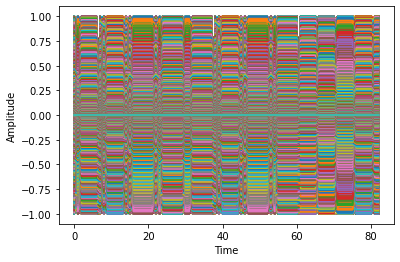

ACABOU DE GERAR O SOM
Ficheiro:
 - Tamanho Ficheiro: 83
 - Duração Ficheiro: 0.003764172335600907
 - Frequência: 22050
 - Número Janelas: 0
 - Tamanho janelas: 11025.0



In [137]:
# Open the audio file
'''
filename = 'Bach_melody.wav'
#filename = 'testRythm_1sec_pausa.wav'
waveFile = wave.open(filename, 'r')

sample_rate = waveFile.getframerate()
# Read all frames from the file
frames = waveFile.readframes(waveFile.getnframes())

# Convert frames to a list of integers
audio_data = list(struct.unpack('<' + 'h'*waveFile.getnframes(), frames))

waveFile.close()'''

note_to_frequency = {
    "C2": 65.41,
    "C#2/Db2": 69.30,
    "D2": 73.42,
    "D#2/Eb2": 77.78,
    "E2": 82.41,
    "F2": 87.31,
    "F#2/Gb2": 92.50,
    "G2": 98.00,
    "G#2/Ab2": 103.83,
    "A2": 110.00,
    "A#2/Bb2": 116.54,
    "B2": 123.47,
    "C3": 130.81,
    "C#3/Db3": 138.59,
    "D3": 146.83,
    "D#3/Eb3": 155.56,
    "E3": 164.81,
    "F3": 174.61,
    "F#3/Gb3": 185.00,
    "G3": 196.00,
    "G#3/Ab3": 207.65,
    "A3": 220.00,
    "A#3/Bb3": 233.08,
    "B3": 246.94,
    "C4": 261.63,
    "C#4/Db4": 277.18,
    "D4": 293.66,
    "D#4/Eb4": 311.13,
    "E4": 329.63,
    "F4": 349.23,
    "F#4/Gb4": 369.99,
    "G4": 392.00,
    "G#4/Ab4": 415.30,
    "A4": 440.00,
    "A#4/Bb4": 466.16,
    "B4": 493.88,
    "C5": 523.25,
    "C#5/Db5": 554.37,
    "D5": 587.33,
    "D#5/Eb5": 622.25,
    "E5": 659.25,
    "F5": 698.46,
    "F#5/Gb5": 739.99,
    "G5": 783.99,
    "G#5/Ab5": 830.61,
    "A5": 880.00,
    "A#5/Bb5": 932.33,
    "B5": 987.77,
    # Continue for other octaves
}

# Happy Birthday
notes = ["C4", "D4", "E4", "E4", "E4", "E4", "E4", "E3", "F3", "G4", "G4", "G4", "G4", "G4", "F4", "E4", "D4", "D4", "D4", "D4", "D4", "D4", "E4", "D4", "C4", "C4", "C4", "C4", "C4",
         "C4", "D4", "D4", "E4", "E4", "E4", "E4", "E4", "E4", "E3", "F3", "G4", "G4", "G4", "G4", "G4", "F4", "E4", "D4", "D4", "D4", "D4", "D4", "D4", "E4", "D4", "C4",
         "C4", "C4", "C4", "C4", "C4", "C5", "C5", "C5", "C5", "C5", "B4", "B4", "B4", "B4", "B4", "A4", "A4", "A4", "A4", "A4", "G4", "G4", "G4", "G4", "G4", "F4", "F4"]
frequencies = [note_to_frequency[note] for note in notes]
durations = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]

audio_data = []

[audio_data.append(sawtoothWave(frequencies[i], durations[i], 44100)) for i in range(len(frequencies))]

#plot the audio
import matplotlib.pyplot as plt
plt.plot(audio_data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()


print("ACABOU DE GERAR O SOM")


# devide the frame into frames of n seconds
audio_size = len(audio_data)
window_size = 0.5 # seconds
num_windows = int(audio_size // (sample_rate * window_size))
mse = 0
print(f"Ficheiro:\n - Tamanho Ficheiro: {len(audio_data)}\n - Duração Ficheiro: {len(audio_data)/sample_rate}\n - Frequência: {sample_rate}\n - Número Janelas: {num_windows}\n - Tamanho janelas: {window_size*sample_rate}\n")
for i in range(num_windows):
    start = int(np.floor(i * window_size*sample_rate + 1))
    end = int(np.floor(start + window_size*sample_rate))
    window = audio_data[start:end]
    window = np.array(window)
    #print(f"Janela {i} | Tamanho: {len(window)}")
    f0 = processSegment(window,  0.03, sample_rate)
    if f0 is not None:
        mse += (f0 - frequencies[i])**2

if num_windows != 0:
    print(f"MSE: {mse/num_windows}")


